#**Python入門（その2）：Pythonで単回帰と相関**

このColabのノートブック「Python入門（その2）」では「statsmodels.formula.apiを使って単回帰（回帰分析）をする方法」を解説します（相関係数は後半に説明します）。
すでに「[Python入門（その1）](https://colab.research.google.com/github/koiti-yano/colab/blob/main/経済統計_python入門_1_basic.ipynb)」を読んでいることを前提に説明します。

> 注：このノートブックは駒澤大学経済学部で開講している「経済統計a/b」で「Excel以外の手法を学ぶ意欲がある履修生向け」に**最低限の知識**だけ解説する**補助資料**です

> このノートブックでは「statsmodels.formula.apiを使う」方法を解説します（Rに慣れている人はこちらの「~」を使う表記の方が馴染みがあるはず）。以下の公式サイトを参考にしました。
<br>
https://www.statsmodels.org/
<br>
https://www.statsmodels.org/devel/example_formulas.html

> 補足：Pythonを使った回帰分析はscikit-learn(sklearn)を利用する記事をよく見かけます。sklearnはとても素晴らしいパッケージなので、興味がある人は公式サイトなどを参照してください。<br>https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# 最初に重要な呪文を唱えます。
# 初心者の間は何をしているのかわからなくても構いません。
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 注釈：statsmodelsのメソッドを使う場合は、以下のように
# statsmodels.apiのimportが必要となります。
# import statsmodels.api as sm
print(sm.__version__)

0.13.5


データ分析（回帰分析）を使うため、データ（CSVファイル）をインターネットから読み込みます。ここではread_csvというメソッドを使ってインターネット上にあるデータをPythonに読み込み、ice_dataという名前で保存します（ice_dataはデータフレームという形式で保存されています）。head()というメソッドはデータを上から5行表示するメソッドです。

In [ ]:
#古い ice_data = pd.read_csv("https://www.dropbox.com/s/2ky13qi387j8b05/kion_iceCream.csv?raw=1",encoding="utf_8")
ice_data = pd.read_csv("https://raw.githubusercontent.com/koiti-yano/colab/main/data/kion_iceCream.csv",encoding="utf_8")
ice_data.head()

,年月,気温,アイスクリーム支出金額
0,2005年4月,15.1,541
1,2005年5月,17.7,666
2,2005年6月,23.2,801
3,2005年7月,25.6,1033
4,2005年8月,28.1,1175


**Pythonで散布図をプロットする**


<Axes: xlabel='気温', ylabel='アイスクリーム支出金額'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 27671 (\N{CJK UNIFIED IDEOGRAPH-6C17}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  

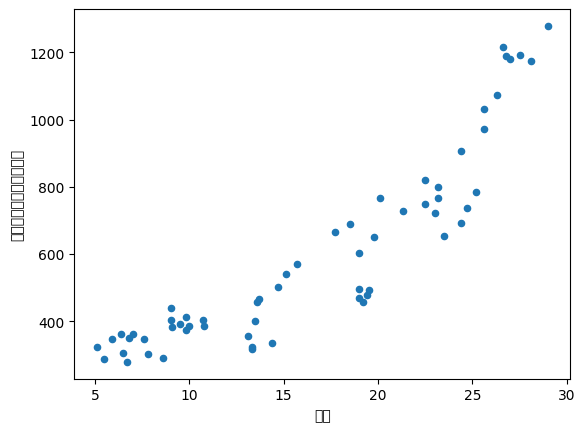

In [ ]:
#散布図の詳細は別の機会に解説します。
ice_data.plot.scatter(x="気温",	y="アイスクリーム支出金額")
#ice_data.plot.scatter(x="年月", y="気温") 

**Pythonで回帰する方法**
<br>
回帰分析（最小二乗法）にはメソッドols()とfit()を使います。使い方は以下の図を見てください（回帰式を指定するとき1重引用符を使って囲むのがポイントです）。

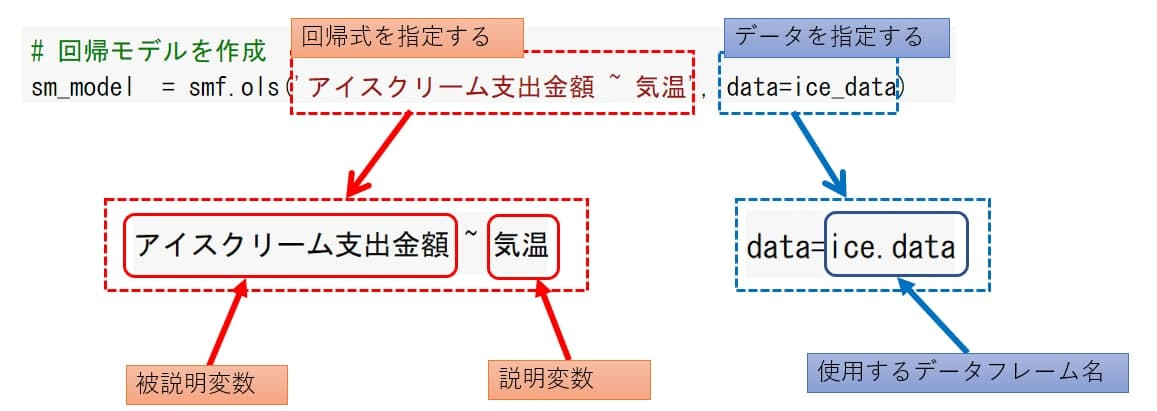

In [ ]:
# 回帰モデルを作成
sm_model  = smf.ols('アイスクリーム支出金額 ~ 気温', data=ice_data)
# 最小二乗法で回帰モデルを推定
result = sm_model.fit()

print(result.params)

Intercept    16.639928
気温           35.074078
dtype: float64


メソッドsummary()を使うと回帰結果をまとめて表示してくれます。

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            アイスクリーム支出金額   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.06e-22
Time:                        05:27:49   Log-Likelihood:                -374.43
No. Observations:                  60   AIC:                             752.9
Df Residuals:                      58   BIC:                             757.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6399     40.652      0.409      0.6

print(result.summary())の詳しい読み方は授業資料で解説しますが、大雑把に図示すると以下のようになります。
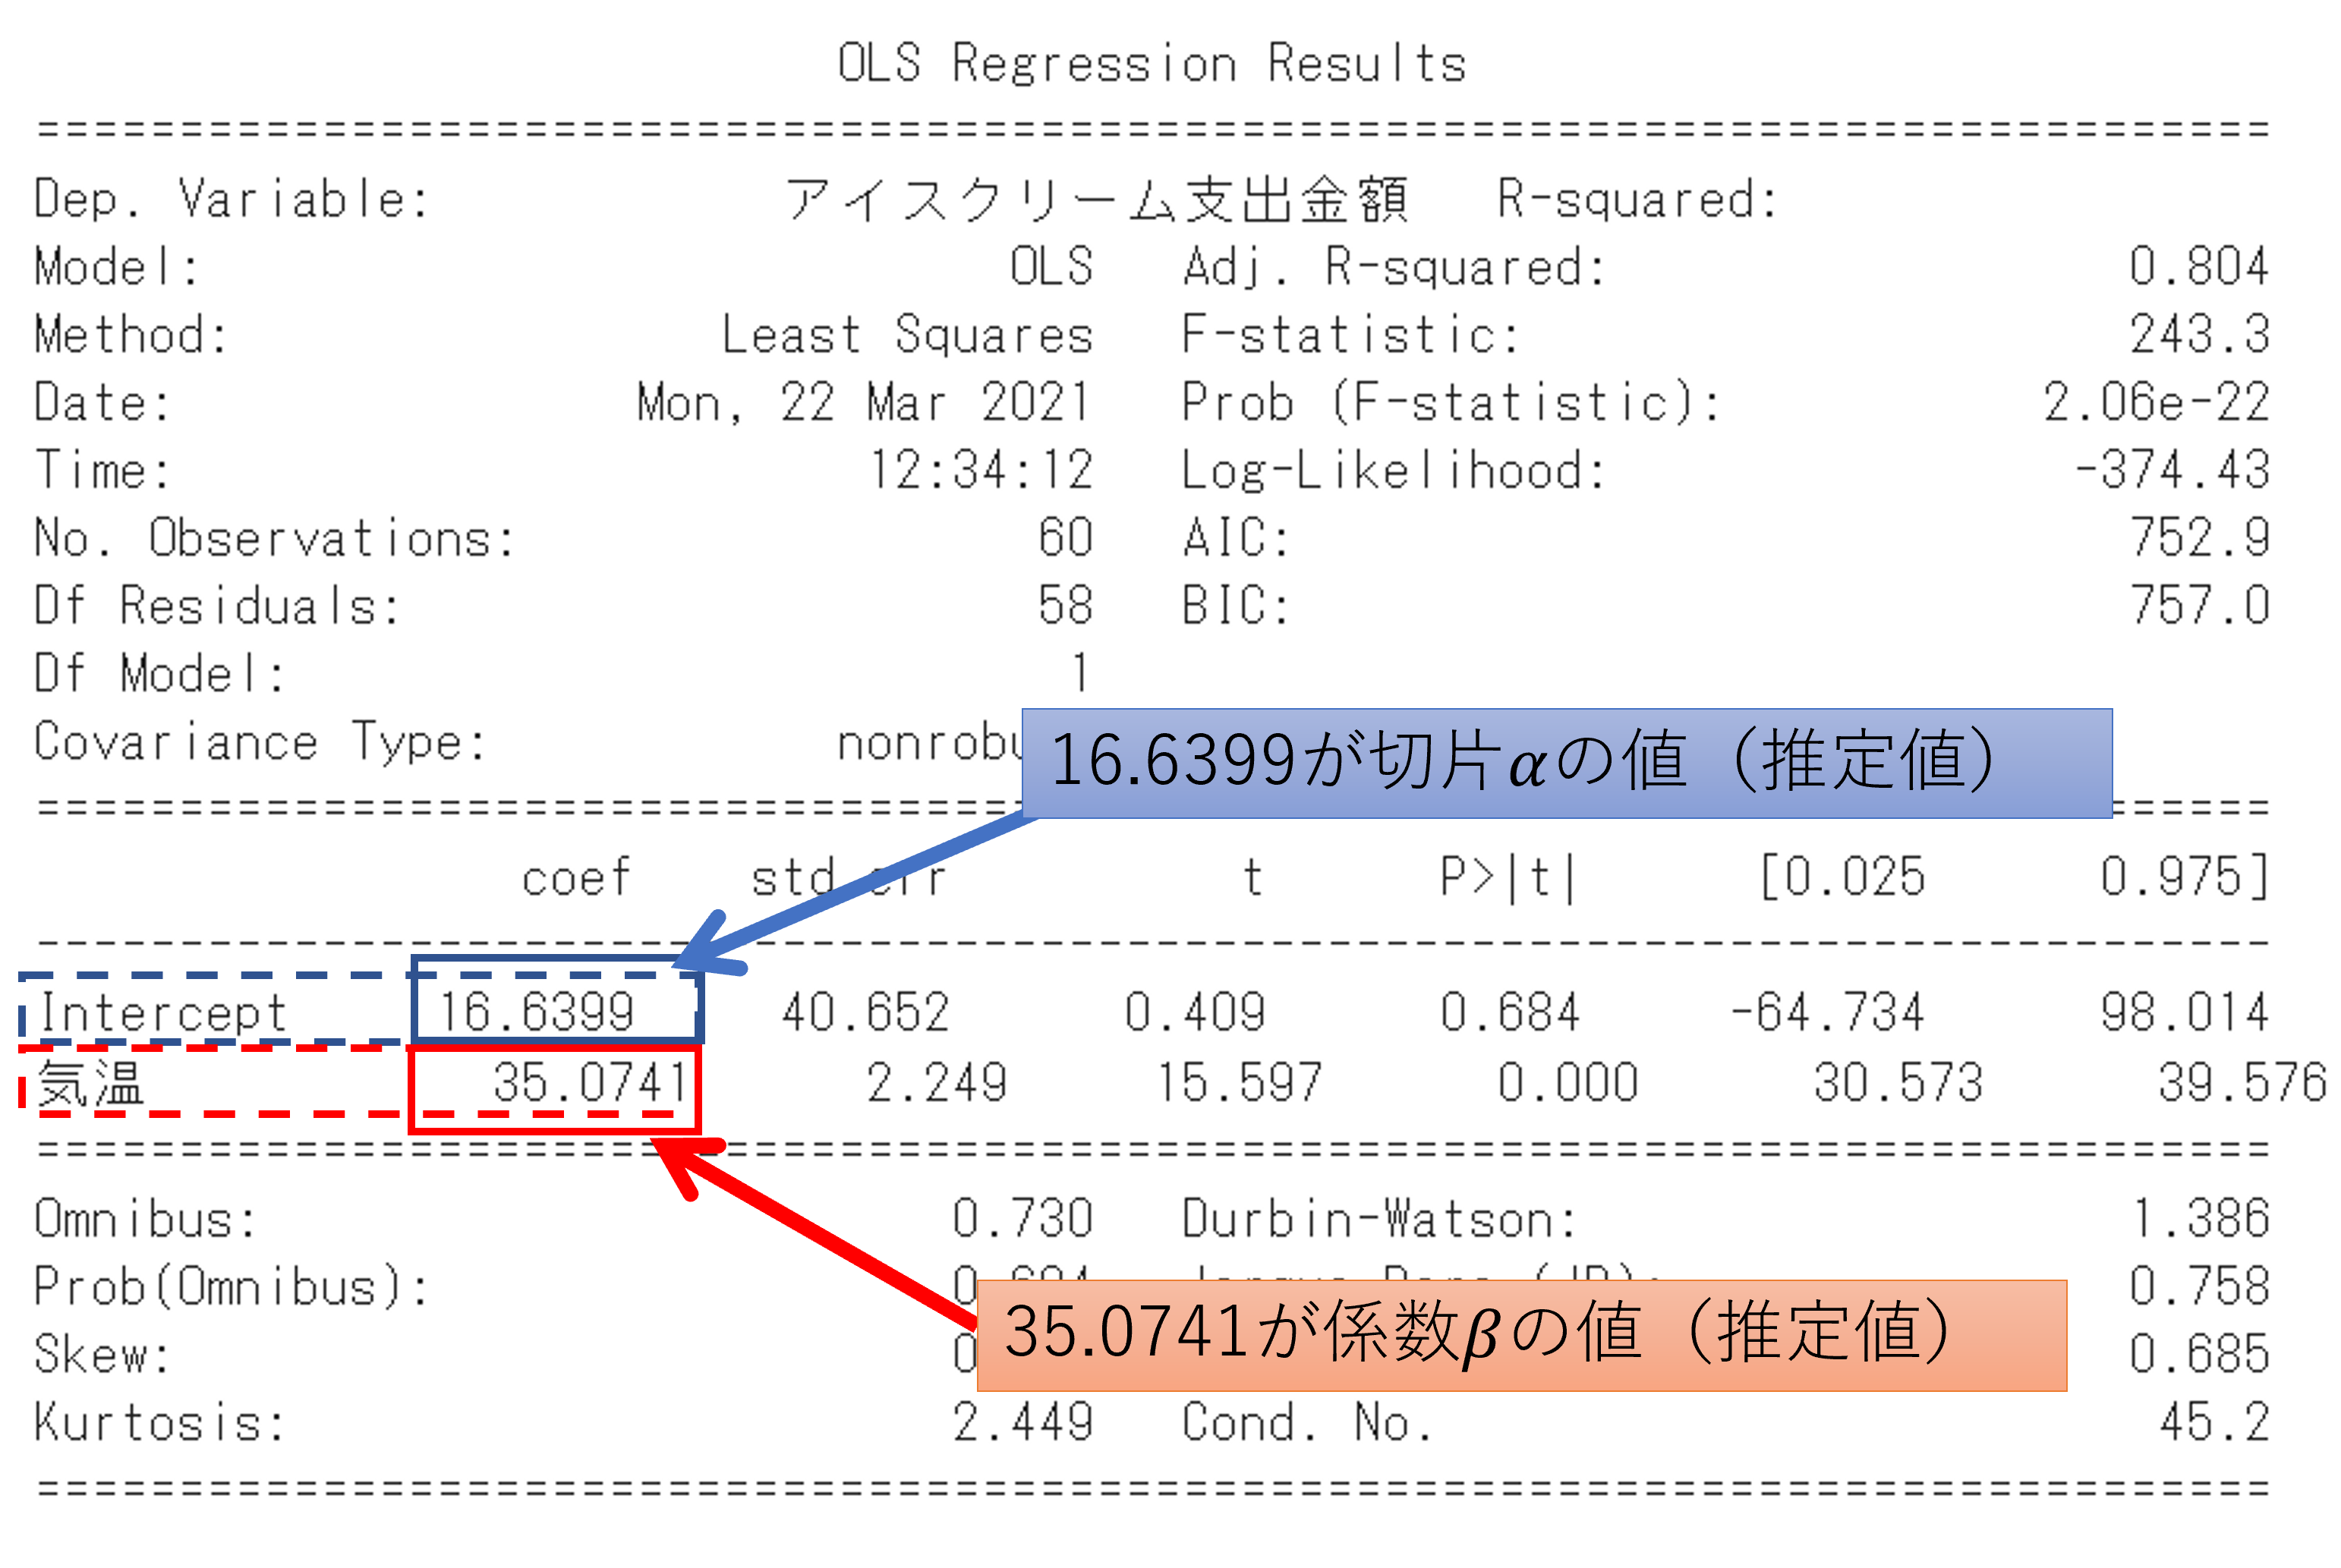

**Pythonの出力結果から単回帰式を書く**

数値の小数第3位を四捨五入すると、単回帰式は以下となります。

$y=35.07x+16.64$

**Pythonで相関係数を計算する**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [ ]:
ice_tmp = ice_data[["気温", "アイスクリーム支出金額"]]
ice_tmp.corr()

,気温,アイスクリーム支出金額
気温,1.000000,0.898597
アイスクリーム支出金額,0.898597,1.000000


**マクロ経済学っぽいテーマをやってみよう！**

最後にマクロ経済学っぽいテーマのデータを見てみましょう。

「日本では合計特殊出生率が低下し、少子高齢化が進んでいる」という話を新聞・ニュース等で聞いたことがある人がいるかもしれません。少子高齢化についてもう少し詳しく書くと、(1)生まれる子供の数が減る、(2)  人口に占める子どもの割合が減り、高齢者の割合が増える、(3)人口成長率が低下する、ということですね。

特に最近、日本では少子高齢化が急激に進行しているため、「日本経済はもうダメだ」と言われることが多いです。実際、少子高齢化は働き手の不足などの大きな問題を生み出すため、日本（だけでなく他の少子高齢化が進む国々）で重要な問題です。

ところで少し唐突ですがマクロ経済学（中級マクロ経済学）では経済成長に関するモデルとしてソロー・モデルが出てきます（ソロー先生とほぼ同時期にスワン先生も考えたので、ソロー・スワン・モデルということも多いです。また、教科書によっては新古典派成長モデルと呼ぶこともあります）。

そのソロー・モデルでは、**人口成長率が上昇すると一人当たりの物質的な豊かさ（一人当たりのGDP）が低下する**という結果が知られています。

> 「え？『人口成長率が上昇すると、一人当たりの物質的な豊かさが増加する』じゃないの？」と思う人がいるかもしれません。実はソローモデルを使うと、(1) 人口成長率が高まると一人当たりの物質的な豊かさ（一人当たりのGDP）が低下する、(2) 逆に言うと人口成長率が低下すると一人当たりの物質的な豊かさ（一人当たりのGDP）が増加することが言えます。

> ちなみに、この話はマクロ経済学ではよく知られた話です。たとえば、グレゴリー・マンキュー先生の『マクロ経済学・応用篇＜第４版＞』（東洋経済新報社）の第1章などで解説されています。

実際のデータでその通りになっているのか確認してみましょう！

> average_pop_growthが2010年から2020年の各国の平均人口成長率、gdp_per_capita_2020_logが2020年の各国の一人当たりのGDP（常用対数変換）です。





In [ ]:
solow_gdp_pop = pd.read_csv("https://raw.githubusercontent.com/koiti-yano/colab/main/data/solow_gdplog_popgrowth.csv",encoding="utf_8")
solow_gdp_pop.head()

,Unnamed: 0,Country.Name,gdp_per_capita_2020,average_pop_growth,gdp_per_capita_2020_log
0,1,Aruba,24487.863560,0.615783,4.388951
1,2,Africa Eastern and Southern,1363.540741,2.732164,3.134668
2,3,Afghanistan,516.866552,3.278240,2.713378
3,4,Africa Western and Central,1683.436391,2.729613,3.226197
4,5,Angola,1603.993477,3.595106,3.205203


<Axes: xlabel='average_pop_growth', ylabel='gdp_per_capita_2020_log'>

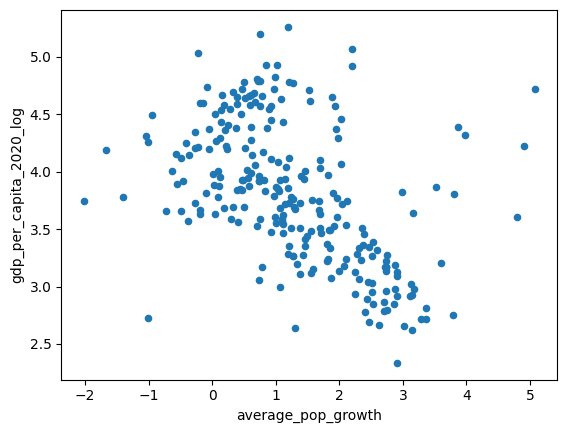

In [ ]:
#散布図の詳細は別の機会に解説します。
solow_gdp_pop.plot.scatter(x="average_pop_growth",	y="gdp_per_capita_2020_log")


In [ ]:
# 回帰モデルを作成
sm_model_solow  = smf.ols('gdp_per_capita_2020_log ~ average_pop_growth', data=solow_gdp_pop)
# 最小二乗法で回帰モデルを推定
result_solow = sm_model_solow.fit()

print(result_solow.summary())

                               OLS Regression Results                              
Dep. Variable:     gdp_per_capita_2020_log   R-squared:                       0.230
Model:                                 OLS   Adj. R-squared:                  0.227
Method:                      Least Squares   F-statistic:                     74.86
Date:                     Wed, 03 May 2023   Prob (F-statistic):           6.26e-16
Time:                             07:24:36   Log-Likelihood:                -200.67
No. Observations:                      252   AIC:                             405.3
Df Residuals:                          250   BIC:                             412.4
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

**Pythonの出力結果から単回帰式を書く**

数値の小数第3位を四捨五入すると、単回帰式は以下となります。

$y=-0.25x+4.12$

**人口成長率と豊かさの回帰結果について一言**
もちろん言うまでもなく、少子高齢化は働き手の不足などの大きな問題を生み出すため、日本（だけでなく少子高齢化が進む他の国々）で重要な問題です。

しかし、少子高齢化（人口成長率の低下）が進む国では「一人当たりの物質的な豊かさが高まる」というちょっと意外な関係も（皆さんに）知っておいてほしいと思います。

> ところで相関は因果を意味しないなどの話は別の機会に授業で解説します。


**最後に一言**

今日はPythonで回帰（単回帰）を実行する方法を解説しました。

「気温が上がると、アイスクリームへの支出が増える」というのは常識的な関係ですが、「人口成長率が低下すると、物質的な豊かさが向上する」というのはちょっと意外な関係だったかもしれません。

データ分析（実証分析）をしていると、このように「ちょっと意外な関係」を見つけることがあり、その辺りが「データ分析が面白い」点ではないかと（個人的には）考えています。

